In [2]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values


In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red(0)/White(1)
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Red(0)/White(1)       6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [6]:
wine_type_counts = df['Red(0)/White(1)'].value_counts().to_frame()
wine_type_counts.head(2)


,Red(0)/White(1)
1,4898
0,1599


In [7]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [8]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [18]:

logreg = linear_model.LogisticRegression(C=10**8) #no regularization 
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)

acc_train = accuracy_score(y_train, yhat_train)
print("Accuracy on training data = %f" % acc_train)

yhat_test = logreg.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test data = %f" % acc_test)

print(x_train.shape)
print(x_test.shape)

Accuracy on training data = 0.981913
Accuracy on test data = 0.987692
(5197, 8)
(1300, 8)


In [10]:
#Logistic Model without Regularization 
w = logreg.coef_
intercept = logreg.intercept_
prec, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary')
print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
print("Coefficients:",w)
print("Intercept:",intercept)


Precision: 0.9882772680937818 
Recall: 0.9877738155883852 
Fscore: 0.9880254777070063
Coefficients: [[-1.47113206 -1.98351604  0.48902628  1.20613146 -1.3355185  -0.89626021
   3.6094699  -1.63207623]]
Intercept: [4.38080056]


In [11]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
fscore_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x_train)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y_train, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge = %f" % acc_train_l2)

print('')

for c in cVals:
    logreg_l2 = linear_model.LogisticRegression(C = c)
    logreg_l2.fit(x_train,y_train)
    # Finding prediction on testing set
    yhat_test_l2 = logreg_l2.predict(x_test)

    # Finding testing accuracy
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    acc_test_ridge.append(acc_test_l2)

    # Finding fscore on test data
    prec_l2, recall_l2 ,fscore_l2,_ = precision_recall_fscore_support(y_test,yhat_test_l2,average='binary')
    fscore_test_ridge.append(fscore_l2)
    print("Accuracy on test data with ridge(c={}): {}".format(c, acc_test_l2))
    print("Fscore on test data with ridge(c={}): {}".format(c, fscore_l2))
    print("Recall on test data with ridge(c={}): {}".format(c, recall_l2))
    print("Precision on test data with ridge(c={}): {}".format(c, prec_l2))

Accuracy on train data with ridge = 0.762555
Accuracy on train data with ridge = 0.955936
Accuracy on train data with ridge = 0.977679
Accuracy on train data with ridge = 0.982105
Accuracy on train data with ridge = 0.981913
Accuracy on train data with ridge = 0.981913
Accuracy on train data with ridge = 0.981913

Accuracy on test data with ridge(c=0.0001): 0.7515384615384615
Fscore on test data with ridge(c=0.0001): 0.8575209528010587
Recall on test data with ridge(c=0.0001): 1.0
Precision on test data with ridge(c=0.0001): 0.7505791505791506
Accuracy on test data with ridge(c=0.001): 0.9676923076923077
Fscore on test data with ridge(c=0.001): 0.9788092835519677
Recall on test data with ridge(c=0.001): 0.9979423868312757
Precision on test data with ridge(c=0.001): 0.9603960396039604
Accuracy on test data with ridge(c=0.01): 0.9823076923076923
Fscore on test data with ridge(c=0.01): 0.9882473173224322
Recall on test data with ridge(c=0.01): 0.9948559670781894
Precision on test data wit

In [12]:
c = 1/(10**3)
logreg_l2 = linear_model.LogisticRegression(C = c)
logreg_l2.fit(x_train, y_train)

yhat_test_l2 = logreg_l2.predict(x_test)
accuracy_test_l2 = accuracy_score(y_test, yhat_test_l2)
prec_l2, recall_l2 ,fscore_l2,_ = precision_recall_fscore_support(y_test,yhat_test_l2,average='binary')
print("Accuracy:", accuracy_test_l2,"\nPrecision:",prec_l2,"\nRecall:",recall_l2,"\nFscore:",fscore_l2)


Accuracy: 0.9676923076923077 
Precision: 0.9603960396039604 
Recall: 0.9979423868312757 
Fscore: 0.9788092835519677


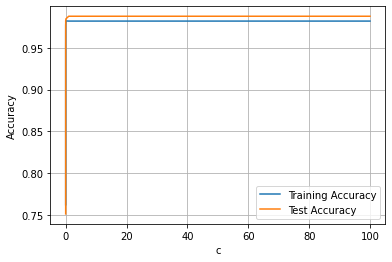

In [13]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_ridge, cVals, acc_test_ridge)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [14]:
#Implementing Lasso Regularization with our model. 
#Note that cVals is defined above 
acc_train_lasso = []
acc_test_lasso = []
fscore_test_lasso = []
for c in cVals: 
    logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    logreg_l1.fit(x_train,y_train)
    yhat_train_l1 = logreg_l1.predict(x_train)
    acc_train_l1 = accuracy_score(y_train, yhat_train_l1)
    print("Accuracy with Ridge Regression (train):",acc_train_l1)
    acc_train_lasso.append(acc_train_l1)

print()

for c in cVals:
    logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    logreg_l1.fit(x_train,y_train)
    yhat_test_l1 = logreg_l1.predict(x_test)
    acc_test_l1 = accuracy_score(y_test, yhat_test_l1)
    print("Accuracy with Ridge Regression (test):",acc_test_l1)
    prec_l1, recall_l1 ,fscore_l1,_ = precision_recall_fscore_support(y_test,yhat_test_l1,average='binary')
    fscore_test_lasso.append(fscore_l1)
    acc_test_lasso.append(acc_test_l1)

print(fscore_test_lasso)

Accuracy with Ridge Regression (train): 0.7554358283625169
Accuracy with Ridge Regression (train): 0.787377333076775
Accuracy with Ridge Regression (train): 0.9761400808158553
Accuracy with Ridge Regression (train): 0.9813353857994997
Accuracy with Ridge Regression (train): 0.9817202232056956
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
Accuracy with Ridge Regression (train): 0.9819126419087936
Accuracy with Ridge Regression (train): 0.9819126419087936

Accuracy with Ridge Regression (test): 0.7476923076923077
Accuracy with Ridge Regression (test): 0.8
Accuracy with Ridge Regression (test): 0.9846153846153847
Accuracy wit

In [15]:
#Comparing Accuracy, recall, fscore and precision for logreg with regularization
logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = 1/10**2, solver = 'saga')
logreg_l1.fit(x_train,y_train)
yhat_test_l1 = logreg_l1.predict(x_test)
acc_test_l1 = accuracy_score(y_test, yhat_test_l1)
print("Accuracy with Lasso Regression (test):",acc_test_l1)
prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_test_l1,average='binary')
print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
#acc_test_lasso.append(acc_test_l1)


Accuracy with Lasso Regression (test): 0.9846153846153847
Precision: 0.9827586206896551 
Recall: 0.9969135802469136 
Fscore: 0.9897854954034729


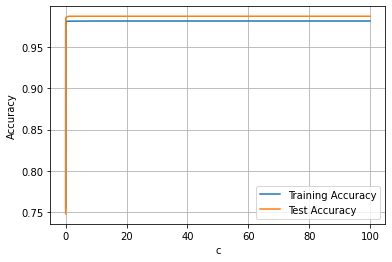

In [16]:
#Plotting the Test and Train accuracies for Lasso Regression
plt.plot(cVals, acc_train_lasso, cVals, acc_test_lasso)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

logreg_poly = linear_model.LogisticRegression(C = 10**8)
logreg_poly.fit(x_train_poly, y_train)
yhat_train_poly = logreg_poly.predict(x_train_poly)
yhat_test_poly = logreg_poly.predict(x_test_poly)


acc_train_poly = accuracy_score(y_train, yhat_train_poly)
acc_test_poly = accuracy_score(y_test, yhat_test_poly)
print("Accuracy with Polynomial Transform (train):",acc_train_poly)
print("Accuracy with Polynomial Transform (test):",acc_test_poly)

Accuracy with Polynomial Transform (train): 0.9942274389070618
Accuracy with Polynomial Transform (test): 0.9892307692307692
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
